In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


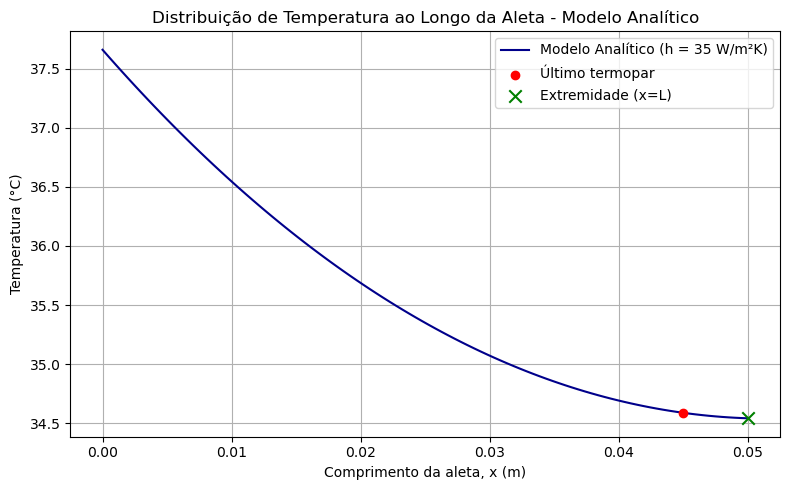

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------
# a) MODELO ANALÍTICO E CONDIÇÕES DE CONTORNO
#------------------------------------------------------------------------------
# Modelo usado:
#   - Base da aleta (x=0): T(0) = T_base
#   - Extremidade da aleta (x=L): Convecção na ponta
#     => -k * A_c * (dT/dx) em x=L = h * P * [T(L) - T_amb]
# A solução geral (em termos de excesso de temperatura θ = T - T_amb) é:
#
#   θ(x) = [ cosh(m(L - x)) + (h/(m k)) sinh(m(L - x)) ]
#           -------------------------------------------
#           [ cosh(mL)      + (h/(m k)) sinh(mL)      ]
#   onde m = sqrt( (h P) / (k A_c) )
#
#------------------------------------------------------------------------------
# b) DESTAQUE DE TEMPERATURAS NO ÚLTIMO TERMOPAR E NA EXTREMIDADE DA ALETA
#    (A posição exata do último termopar deve ser conhecida/estimada da medição.)
#------------------------------------------------------------------------------
# Para ilustrar, vamos definir manualmente a posição do último termopar:
x_ultimo_termopar = 0.045  # Exemplo: 4,5 cm (deve ser ajustado conforme o experimento real!)

#------------------------------------------------------------------------------
# c) ESTIMATIVA DO COEFICIENTE DE CONVECÇÃO (h) E JUSTIFICATIVA
#------------------------------------------------------------------------------
# Supondo h ~ 35 W/(m²·K), baseado em valores típicos para convecção forçada
# moderada em superfícies pequenas. Esse valor pode ser obtido via correlações
# empíricas (p. ex. correlação de Nusselt) ou medições experimentais.
h = 35

#------------------------------------------------------------------------------
# d) CÁLCULO E GRÁFICO
#------------------------------------------------------------------------------

# 1) Leitura de dados experimentais (exemplo de leitura; comentar/ajustar se necessário)
df = pd.read_excel("sistema1.xlsx")

# 2) Temperaturas (média das últimas 10 linhas, conforme informado)
T_amb = 18.0229           # Média de canais 101, 115 e 116
T_base = 37.66029778      # Canal 102
T_media_aleta = 37.95871721  # Média dos canais 103 a 113 (usada aqui apenas para cálculo do k)

# 3) Temperatura de filme (se for necessário para estimar k)
T_film = (T_media_aleta + T_amb) / 2

# 4) Condutividade térmica k do Alumínio 2014 (estimada)
k = 160  # W/m.K (valor aproximado da literatura/gráfico)

# 5) Dimensões da aleta tipo pino
L = 0.05      # m (5 cm)
D = 0.00635   # m (1/4" ≈ 6,35 mm)
Ac = np.pi*(D/2)**2  # Área da seção transversal
P  = np.pi*D         # Perímetro lateral

# 6) Cálculo do parâmetro m
m = np.sqrt( (h * P) / (k * Ac) )

# 7) Cálculo analítico da temperatura ao longo do comprimento
x = np.linspace(0, L, 100)  # posições
numerador   = np.cosh(m*(L - x)) + (h/(m*k))*np.sinh(m*(L - x))
denominador = np.cosh(m*L)          + (h/(m*k))*np.sinh(m*L)
theta       = numerador / denominador  # Excesso de temperatura T - T_amb
T_analitico = T_amb + (T_base - T_amb)*theta

# 8) Temperaturas específicas
T_ultimo_termopar   = np.interp(x_ultimo_termopar, x, T_analitico)
T_extremidade_aleta = T_analitico[-1]  # em x=L

# 9) Plot
plt.figure(figsize=(8, 5))
plt.plot(x, T_analitico, label=f"Modelo Analítico (h = {h} W/m²K)", color="darkblue")

# Destacar o último termopar
plt.scatter(x_ultimo_termopar, T_ultimo_termopar,
            color='red', zorder=5, label="Último termopar")

# Destacar a extremidade da aleta
plt.scatter(L, T_extremidade_aleta,
            color='green', marker='x', s=80, zorder=5,
            label="Extremidade (x=L)")

plt.xlabel("Comprimento da aleta, x (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Distribuição de Temperatura ao Longo da Aleta - Modelo Analítico")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#------------------------------------------------------------------------------
# Comentários finais sobre cada item:
# a) Modelo analítico: Usamos solução de uma aleta com base a T_base e ponta convectiva.
# b) O último termopar (vermelho) não está em x=L; a extremidade (verde) mostra T(L).
# c) h estimado em 35 W/(m²·K) por correlações típicas de convecção forçada em metais.
# d) O gráfico acima exibe T(x) e inclui o valor de h na legenda.
#------------------------------------------------------------------------------
